## Table of content


<p dir="ltr">1- Importing libraries</p>
<p dir="ltr">2- Data Pre-processing&nbsp;</p>
<p dir="ltr">4- Data splitting into train and test</p>

<p dir="ltr">5- Model training and Model Evaluation</p>
<p dir="ltr"></p>
<ol>
    <li>KNN</li>
    <li>Logistic regression</li>
    <li>Neural Network</li>
    <li>SVM</li>
    <li>GaussianNB</li>
</ol>
<p></p>
<p>6- Model Comparison&nbsp;</p>
<p></p>

## Connect to google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the libraries


In [6]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from datetime import datetime

## Data Preprocessing

In [7]:
# Read dataset
# Change your dataset path
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DDos_ML/DDos_and_Normal_Traffic_Dataset.csv")
df.head(-10)

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,avg_packet_size,flow_duration_total,idle_mean,idle_std,idle_max,idle_min,label
0,1.719371e+09,1,192.168.0.15050192.168.1.4532686,192.168.0.1,5050,192.168.1.4,53268,6,-1,-1,...,8.863929e-05,2.635596e+06,5.850380e-03,66.002104,2.901,0.000000,0.000000,0.000000,0.000000,0
1,1.719371e+09,1,192.168.1.453268192.168.0.150506,192.168.1.4,53268,192.168.0.1,5050,6,-1,-1,...,1.384392e-04,3.108656e+09,6.877558e+00,49679.278252,2.904,0.000000,0.000000,0.000000,0.000000,0
2,1.719371e+09,2,192.168.0.15050192.168.1.4532686,192.168.0.1,5050,192.168.1.4,53268,6,-1,-1,...,9.024181e-05,2.635596e+06,5.956149e-03,66.002104,2.885,0.000815,0.000000,0.000815,0.000815,0
3,1.719371e+09,2,192.168.1.453268192.168.0.150506,192.168.1.4,53268,192.168.0.1,5050,6,-1,-1,...,1.372259e-04,3.108656e+09,6.817228e+00,49678.882078,2.912,0.000815,0.000000,0.000815,0.000815,0
4,1.719371e+09,2,192.168.1.40192.168.1.501,192.168.1.4,0,192.168.1.5,0,1,0,8,...,2.202643e-09,9.800000e+01,2.158590e-07,98.000000,2.908,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544978,1.721880e+09,1,192.168.1.40192.168.0.301,192.168.1.4,0,192.168.0.3,0,1,0,8,...,1.173913e-06,9.230233e+01,1.150435e-04,98.000000,86.069,25.336605,153.432711,2583.222451,0.000000,0
544979,1.721880e+09,2,192.168.0.15050192.168.1.4411846,192.168.0.1,5050,192.168.1.4,41184,6,-1,-1,...,6.147557e-04,6.725208e+06,4.057441e-02,66.000873,4.663,0.002709,0.000000,0.002709,0.002709,0
544980,1.721880e+09,2,192.168.0.30192.168.1.401,192.168.0.3,0,192.168.1.4,0,1,0,0,...,1.446429e-06,9.230233e+01,1.417500e-04,98.000000,86.056,25.315226,153.369722,2583.222451,0.000000,0
544981,1.721880e+09,2,192.168.1.441184192.168.0.150506,192.168.1.4,41184,192.168.0.1,5050,6,-1,-1,...,7.068486e-04,5.164284e+09,3.097022e+01,43814.506859,4.667,0.002709,0.000000,0.002709,0.002709,0


label
1    279155
0    265838
Name: count, dtype: int64


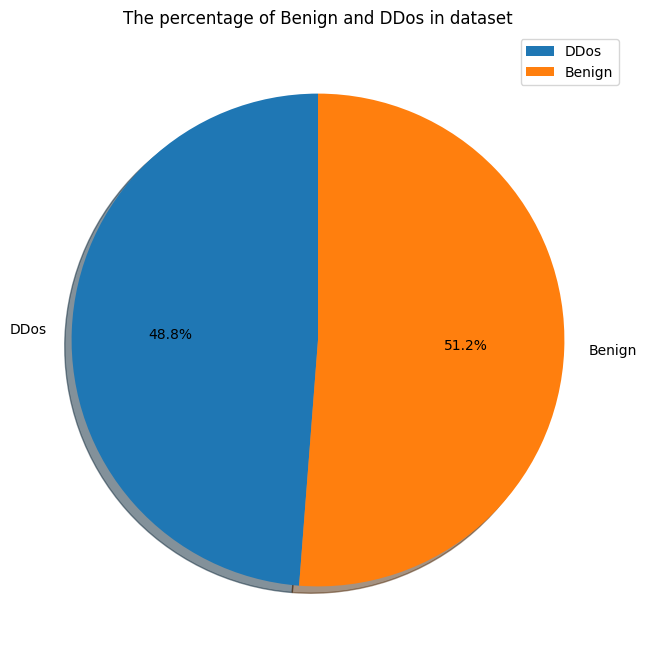

In [8]:
print(df.label.value_counts())
labels = ["DDos",'Benign']
sizes = [dict(df.label.value_counts())[0], dict(df.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["DDos", "Benign"])
plt.title('The percentage of Benign and DDos in dataset')
plt.show()

In [9]:
# Count missing value for each feature
print(df.isna().sum())

timestamp                   0
datapath_id                 0
flow_id                     0
ip_src                      0
tp_src                      0
ip_dst                      0
tp_dst                      0
ip_proto                    0
icmp_code                   0
icmp_type                   0
flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
flags                       0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
avg_packet_size             0
flow_duration_total         0
idle_mean                   0
idle_std                    0
idle_max                    0
idle_min                    0
label                       0
dtype: int64


In [10]:
# Extract features for training
df_4_features = df[['packet_count', 'flow_duration_sec', 'byte_count', 'packet_count_per_second', 'label']]
df_10_features = df[['packet_count', 'flow_duration_sec', 'byte_count', 'packet_count_per_second', 'byte_count_per_second', 'avg_packet_size', 'idle_mean', 'idle_std', 'idle_max', 'idle_min', 'label']]
df_15_features = df[['ip_src', 'ip_dst', 'flow_duration_nsec', 'flags', 'packet_count', 'flow_duration_sec', 'byte_count', 'packet_count_per_second', 'byte_count_per_second', 'avg_packet_size', 'flow_duration_total', 'idle_mean', 'idle_std', 'idle_max', 'idle_min', 'label']]
df_all_features = df

In [11]:
df_15_features.loc[:, 'ip_src'] = df_15_features['ip_src'].str.replace('.', '')
df_15_features.loc[:, 'ip_dst'] = df_15_features['ip_dst'].str.replace('.', '')

df_all_features.loc[:, 'ip_src'] = df_all_features['ip_src'].str.replace('.', '')
df_all_features.loc[:, 'ip_dst'] = df_all_features['ip_dst'].str.replace('.', '')
df_all_features.loc[:, 'flow_id'] = df_all_features['flow_id'].str.replace('.', '')

## Data splitting into train and test

# ----------------------------Training the model--------------------------------

### Model Evaluation

In [12]:
# Function to evaluate model
def evaluate_model(y_test, y_pred, start_time, end_time):
    acc = accuracy_score(y_test, y_pred)
    print("Success accuracy = {0:.2f} %".format(acc*100))
    fail = 1.0 - acc
    print("Fail accuracy = {0:.2f} %".format(fail*100))
    training_time = end_time - start_time
    #hours, rem = divmod(training_time.seconds, 3600)
    #minutes, seconds = divmod(rem, 60)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Precision:", precision*100)
    print("Recall:", recall*100)
    print("F1-score:", f1*100)
    print(f"Training time: {training_time}")
    return acc, fail, precision, recall, f1, training_time

# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Traning model

In [13]:
def train_and_evaluate(df, feature_set_name):
    X = df.drop('label', axis=1).values.astype(float)
    y = df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    print(f"The train dataset size for {feature_set_name} = ", X_train.shape)
    print(f"The test dataset size for {feature_set_name} = ", X_test.shape)

    models = {
        'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
        'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(5,), max_iter=20, random_state=42, solver='sgd'),
        'SVM': SVC(max_iter=1000, probability=True),
        'GaussianNB': GaussianNB()
    }

    results = []

    for model_name, model in models.items():
        print(f"Evaluate {model_name} Model on {feature_set_name}")
        start_time = datetime.now()
        try:
            model.fit(X_train, y_train)
        except Exception as e:
            print(f"Error while fitting {model_name}: {e}")
            continue
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
        end_time = datetime.now()
        acc, fail, precision, recall, f1, training_time = evaluate_model(y_test, y_pred, start_time, end_time)

        # Calculate ROC and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print(f"AUC:", roc_auc*100)

        results.append({
            'Model': model_name,
            'Success Accuracy': acc * 100,
            'Fail Accuracy': fail * 100,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1 Score': f1 * 100,
            'Training Time': training_time.total_seconds(),
            'AUC': roc_auc
        })
        plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], f'{model_name} Confusion Matrix ({feature_set_name})')
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic ({feature_set_name})')
        plt.legend(loc='lower right')
        plt.show()

    results_df = pd.DataFrame(results)
    print(results_df)
    return results_df

## Model Comparison

The train dataset size for 4 Features =  (408744, 4)
The test dataset size for 4 Features =  (136249, 4)
Evaluate KNN Model on 4 Features
Success accuracy = 83.75 %
Fail accuracy = 16.25 %
Precision: 84.11054927441086
Recall: 83.74666970032808
F1-score: 83.67520592830094
Training time: 0:03:00.526697
AUC: 87.62061313110382


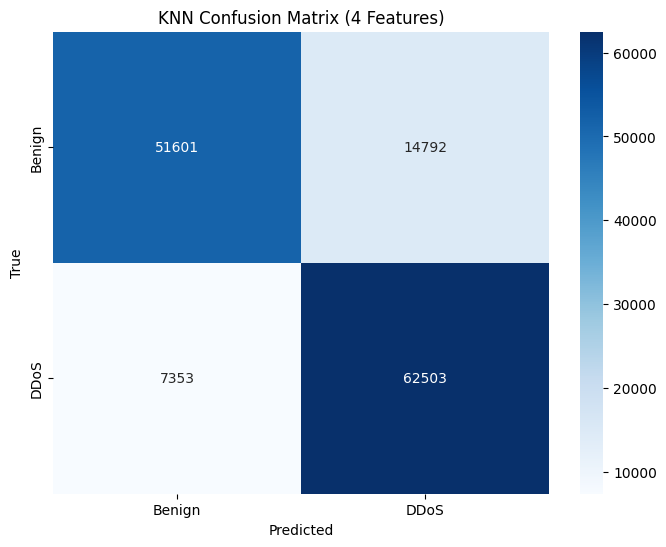

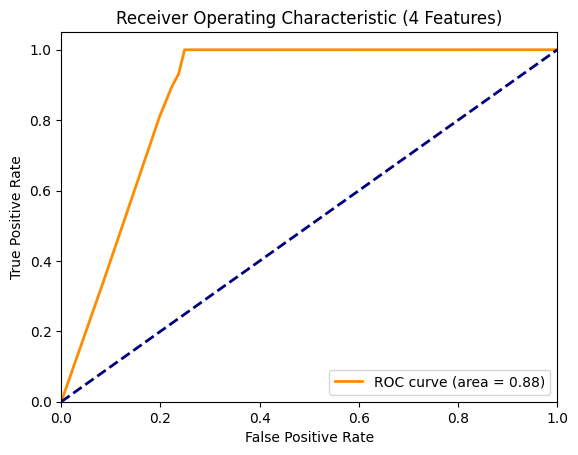

Evaluate Logistic Regression Model on 4 Features
Success accuracy = 50.37 %
Fail accuracy = 49.63 %
Precision: 61.67279155301543
Recall: 50.37101189733503
F1-score: 36.91732634599255
Training time: 0:00:03.945967
AUC: 78.68802336879652


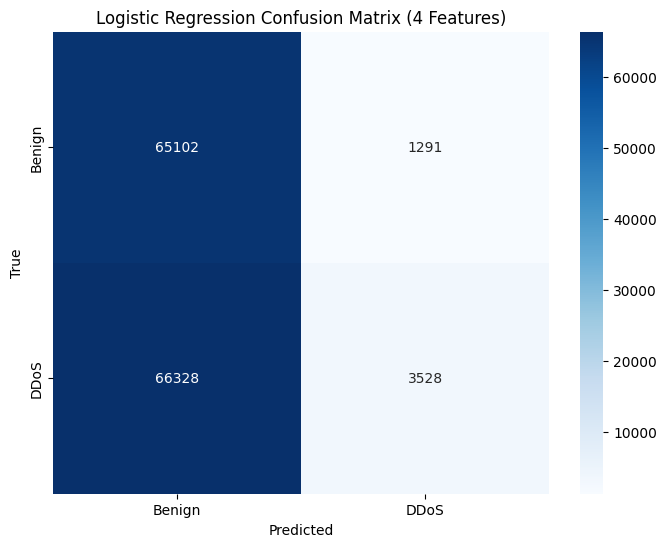

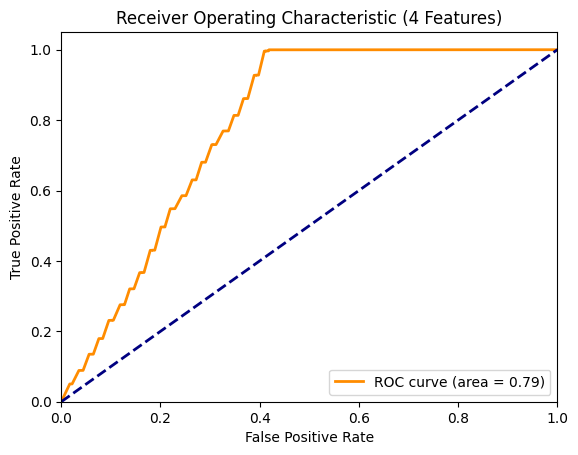

Evaluate Neural Network Model on 4 Features
Success accuracy = 87.59 %
Fail accuracy = 12.41 %
Precision: 89.74470354195098
Recall: 87.58816578470301
F1-score: 87.37460752003886
Training time: 0:00:09.676981
AUC: 87.49900754631086


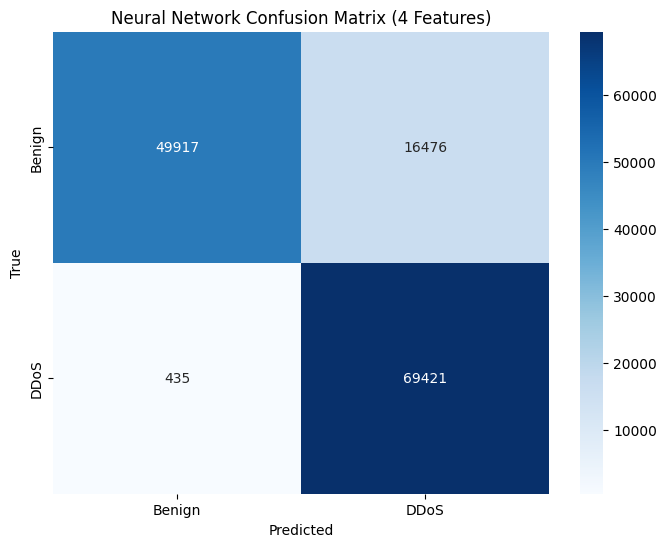

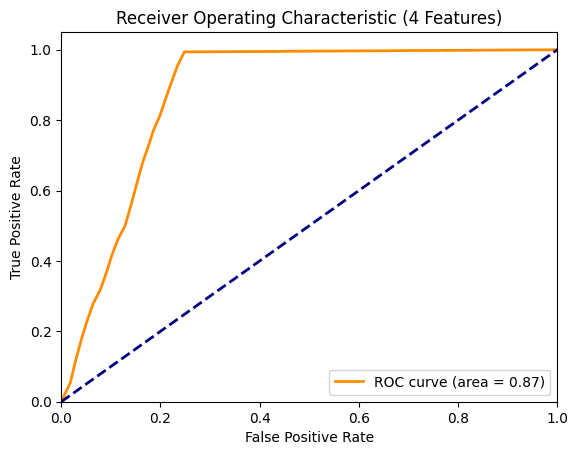

Evaluate SVM Model on 4 Features


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 54.72 %
Fail accuracy = 45.28 %
Precision: 75.94499577517986
Recall: 54.72040161762655
F1-score: 42.009965099277316
Training time: 0:11:36.576334
AUC: 53.5403708633986


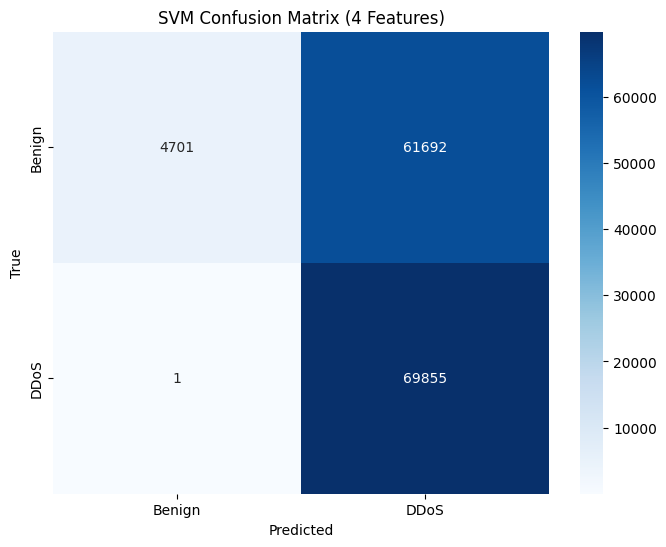

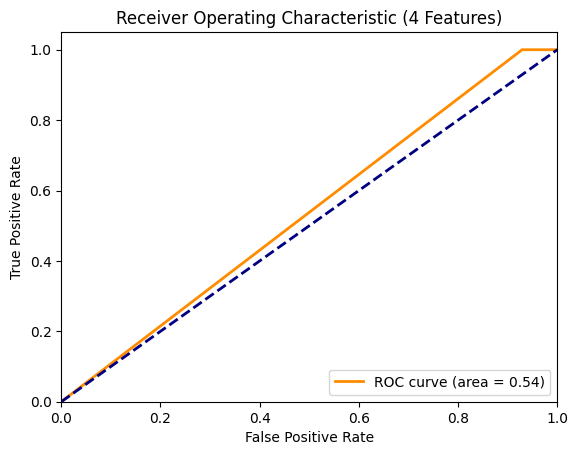

Evaluate GaussianNB Model on 4 Features
Success accuracy = 57.70 %
Fail accuracy = 42.30 %
Precision: 76.816411713435
Recall: 57.69877210107964
F1-score: 47.655747437332394
Training time: 0:00:00.172676
AUC: 86.73713426155597


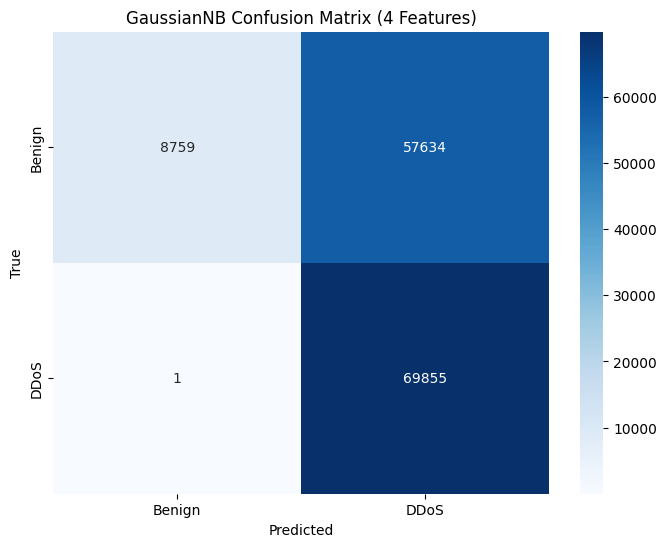

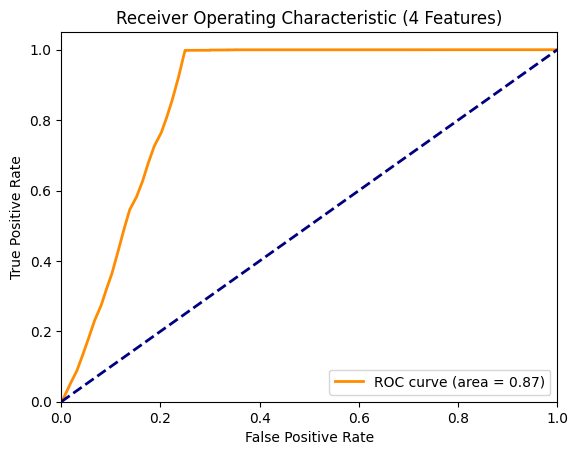

                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         83.746670      16.253330  84.110549  83.746670   
1  Logistic Regression         50.371012      49.628988  61.672792  50.371012   
2       Neural Network         87.588166      12.411834  89.744704  87.588166   
3                  SVM         54.720402      45.279598  75.944996  54.720402   
4           GaussianNB         57.698772      42.301228  76.816412  57.698772   

    F1 Score  Training Time       AUC  
0  83.675206     180.526697  0.876206  
1  36.917326       3.945967  0.786880  
2  87.374608       9.676981  0.874990  
3  42.009965     696.576334  0.535404  
4  47.655747       0.172676  0.867371  
The train dataset size for 10 Features =  (408744, 10)
The test dataset size for 10 Features =  (136249, 10)
Evaluate KNN Model on 10 Features
Success accuracy = 96.16 %
Fail accuracy = 3.84 %
Precision: 96.4244242305082
Recall: 96.16070576664782
F1-score: 96.1513658043460

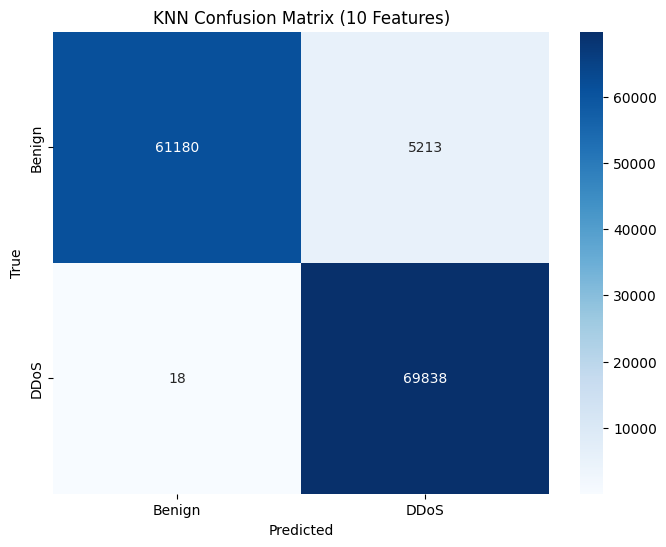

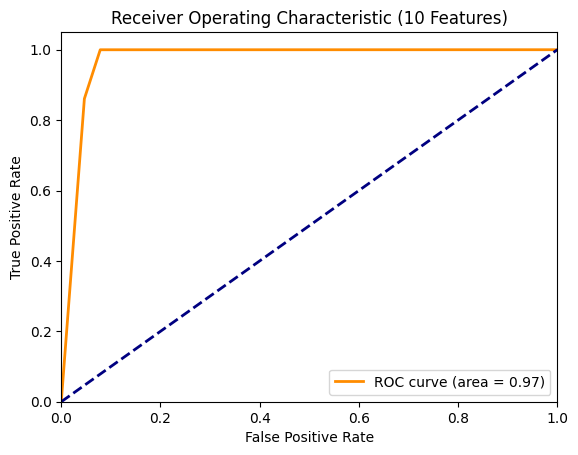

Evaluate Logistic Regression Model on 10 Features
Success accuracy = 64.08 %
Fail accuracy = 35.92 %
Precision: 68.97694940352453
Recall: 64.07680056367386
F1-score: 62.03897557462032
Training time: 0:00:13.622845
AUC: 89.43295877366326


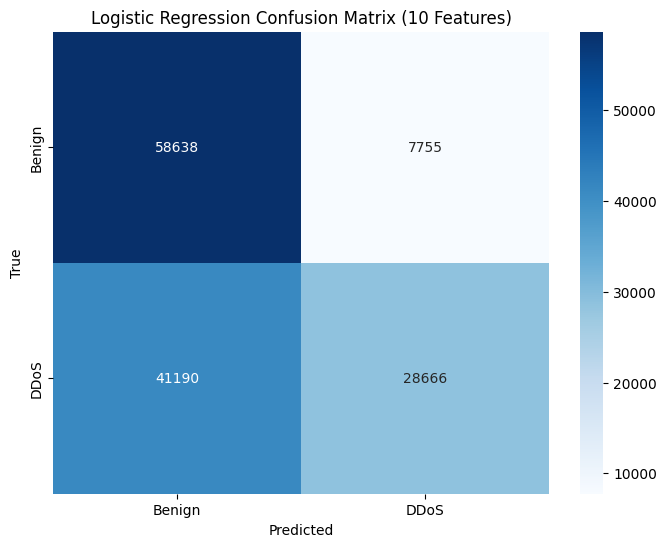

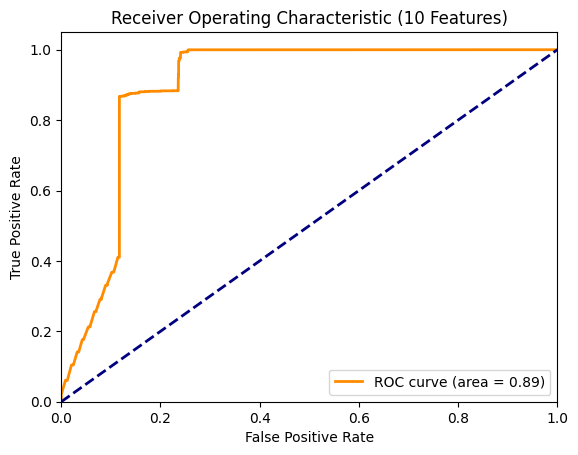

Evaluate Neural Network Model on 10 Features


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Success accuracy = 89.02 %
Fail accuracy = 10.98 %
Precision: 90.06861724990925
Recall: 89.0237726515424
F1-score: 88.92567365025121
Training time: 0:00:15.312421
AUC: 91.75360485087893


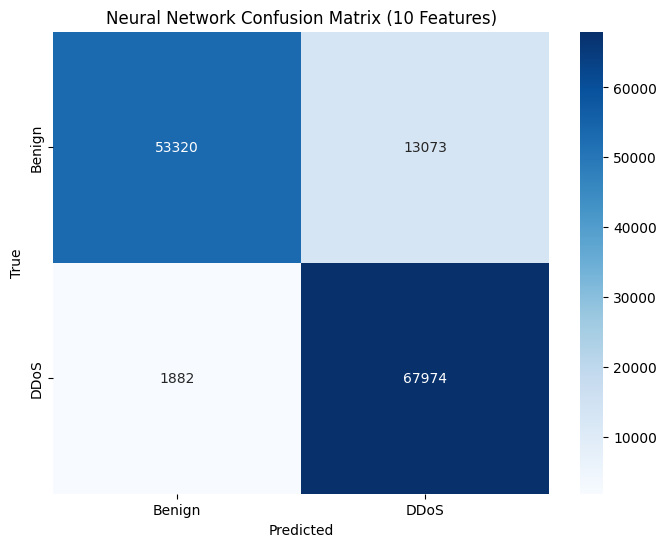

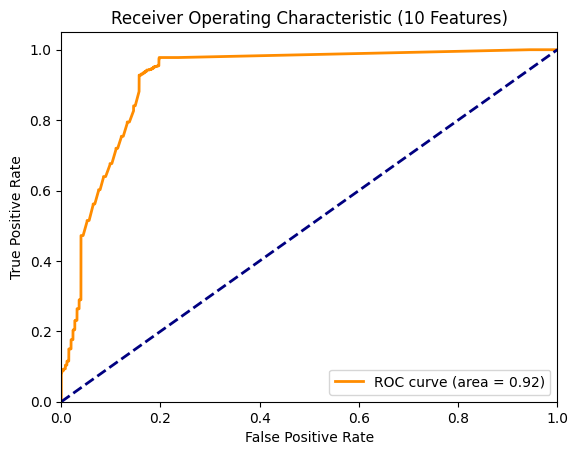

Evaluate SVM Model on 10 Features


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 54.72 %
Fail accuracy = 45.28 %
Precision: 75.94499577517986
Recall: 54.72040161762655
F1-score: 42.009965099277316
Training time: 0:15:26.313650
AUC: 54.76864541942843


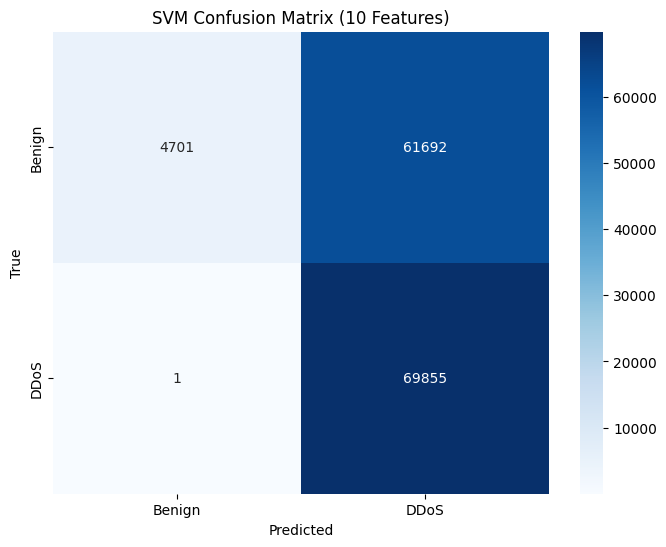

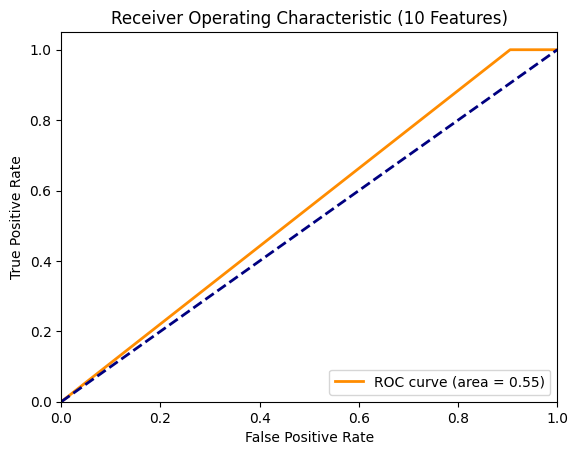

Evaluate GaussianNB Model on 10 Features
Success accuracy = 57.89 %
Fail accuracy = 42.11 %
Precision: 76.86928834561603
Recall: 57.89180104074158
F1-score: 48.005273811110776
Training time: 0:00:00.261588
AUC: 86.95267196196203


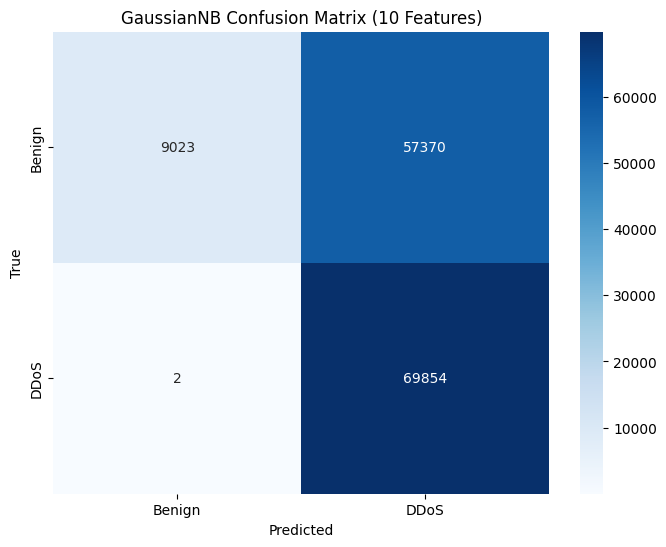

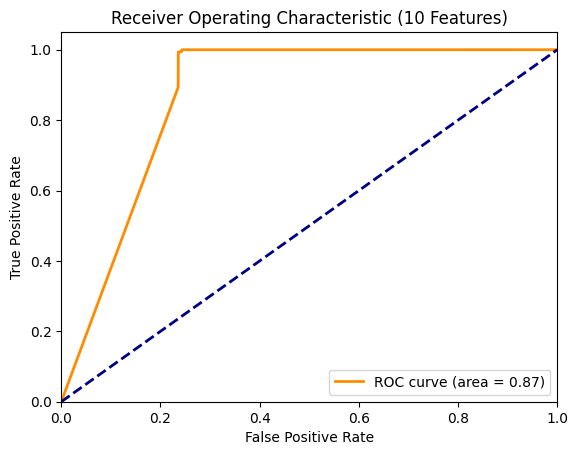

                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         96.160706       3.839294  96.424424  96.160706   
1  Logistic Regression         64.076801      35.923199  68.976949  64.076801   
2       Neural Network         89.023773      10.976227  90.068617  89.023773   
3                  SVM         54.720402      45.279598  75.944996  54.720402   
4           GaussianNB         57.891801      42.108199  76.869288  57.891801   

    F1 Score  Training Time       AUC  
0  96.151366     114.609731  0.971187  
1  62.038976      13.622845  0.894330  
2  88.925674      15.312421  0.917536  
3  42.009965     926.313650  0.547686  
4  48.005274       0.261588  0.869527  
The train dataset size for 15 Features =  (408744, 15)
The test dataset size for 15 Features =  (136249, 15)
Evaluate KNN Model on 15 Features
Success accuracy = 99.39 %
Fail accuracy = 0.61 %
Precision: 99.39329563769671
Recall: 99.38568356465002
F1-score: 99.385756208512

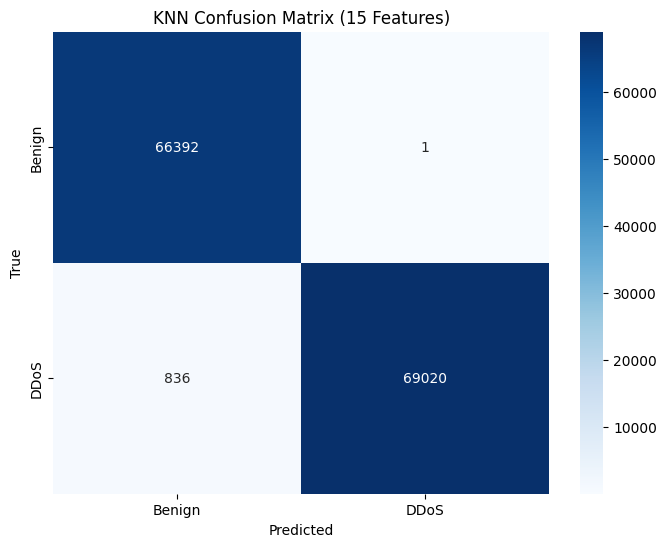

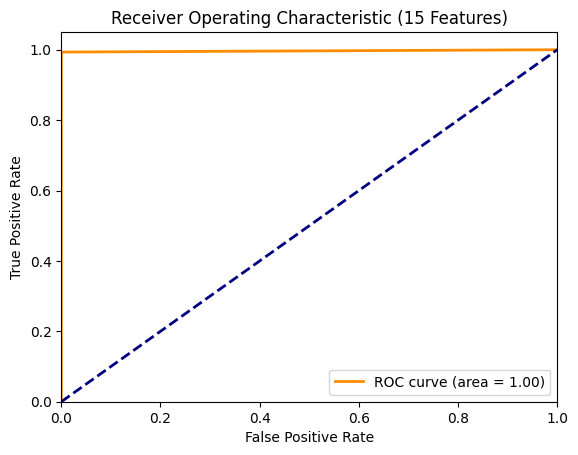

Evaluate Logistic Regression Model on 15 Features
Success accuracy = 91.78 %
Fail accuracy = 8.22 %
Precision: 91.82998236017407
Recall: 91.77902223135582
F1-score: 91.77221488764738
Training time: 0:00:02.790015
AUC: 97.37704818879301


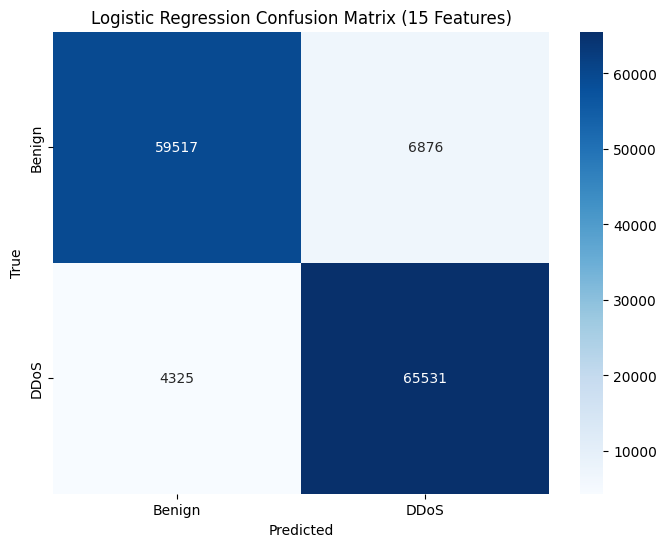

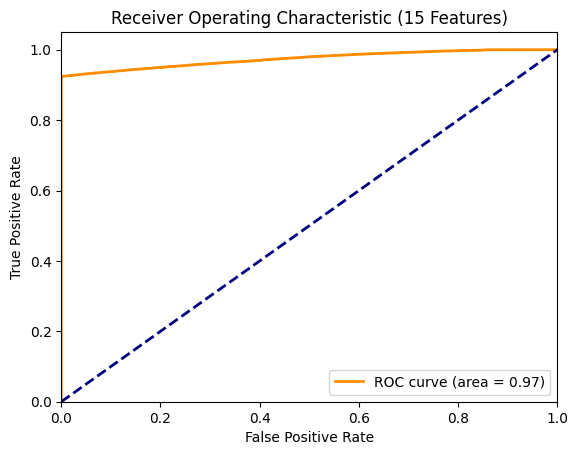

Evaluate Neural Network Model on 15 Features
Success accuracy = 51.27 %
Fail accuracy = 48.73 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 26.28698523166406
Recall: 51.270835015302865
F1-score: 34.754862335498856
Training time: 0:00:10.145863
AUC: 50.0


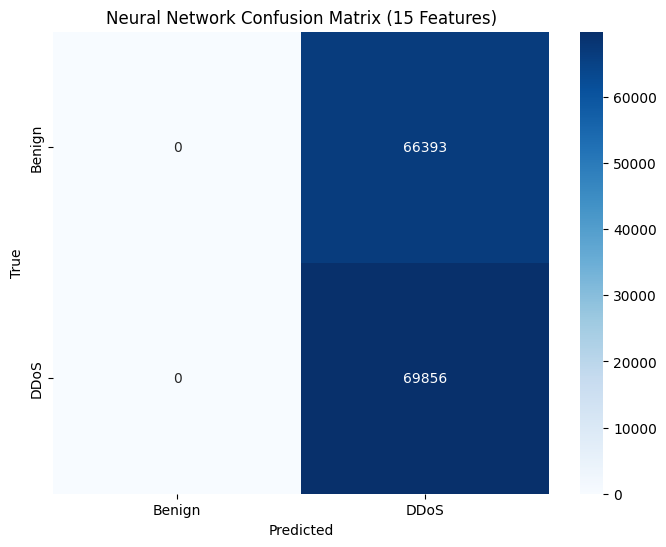

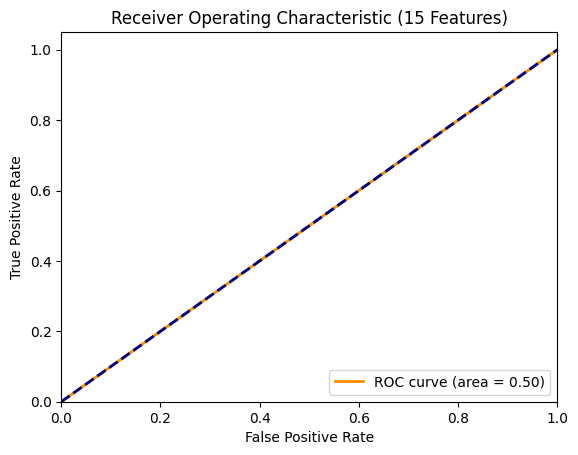

Evaluate SVM Model on 15 Features


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 36.64 %
Fail accuracy = 63.36 %
Precision: 29.211173336466302
Recall: 36.64393867110951
F1-score: 30.85005146148592
Training time: 0:16:16.669635
AUC: 22.375426739454422


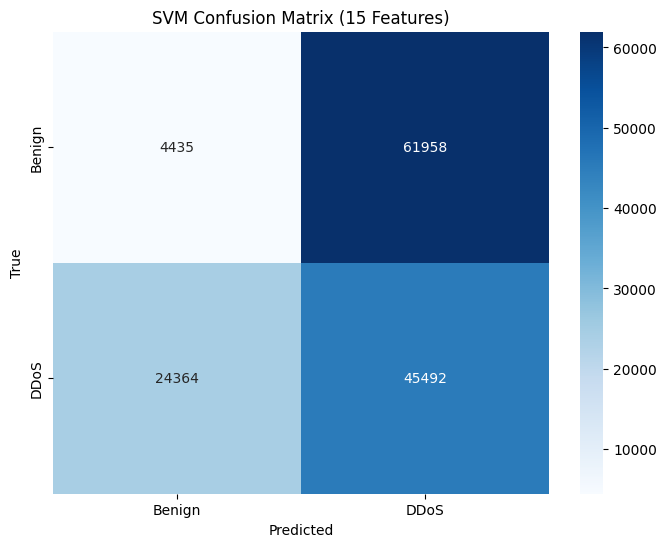

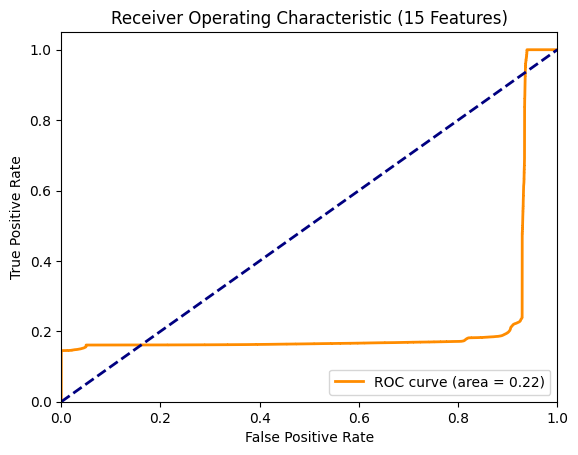

Evaluate GaussianNB Model on 15 Features
Success accuracy = 93.99 %
Fail accuracy = 6.01 %
Precision: 94.21602817677724
Recall: 93.99261645957034
F1-score: 93.97908409930308
Training time: 0:00:00.365574
AUC: 99.5282735304904


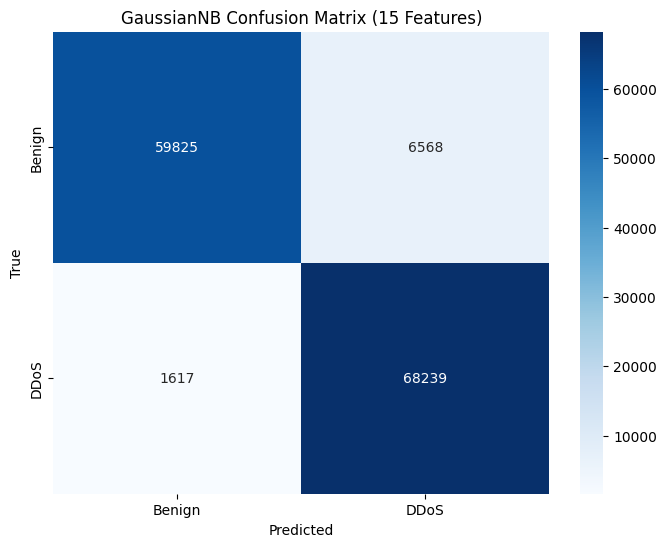

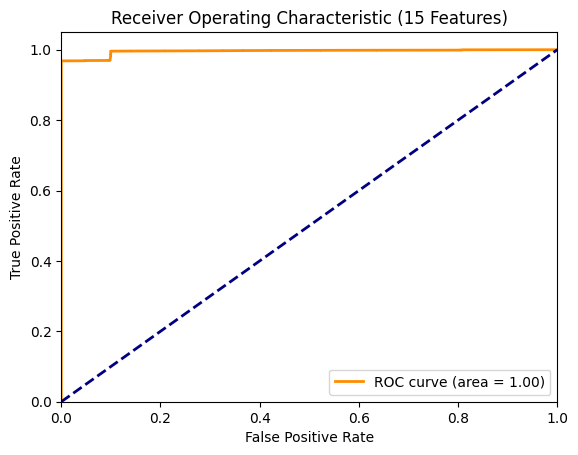

                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         99.385684       0.614316  99.393296  99.385684   
1  Logistic Regression         91.779022       8.220978  91.829982  91.779022   
2       Neural Network         51.270835      48.729165  26.286985  51.270835   
3                  SVM         36.643939      63.356061  29.211173  36.643939   
4           GaussianNB         93.992616       6.007384  94.216028  93.992616   

    F1 Score  Training Time       AUC  
0  99.385756      52.313038  0.996657  
1  91.772215       2.790015  0.973770  
2  34.754862      10.145863  0.500000  
3  30.850051     976.669635  0.223754  
4  93.979084       0.365574  0.995283  
The train dataset size for All Features =  (408744, 27)
The test dataset size for All Features =  (136249, 27)
Evaluate KNN Model on All Features
Success accuracy = 98.74 %
Fail accuracy = 1.26 %
Precision: 98.73937931696643
Recall: 98.73833936395864
F1-score: 98.738402523

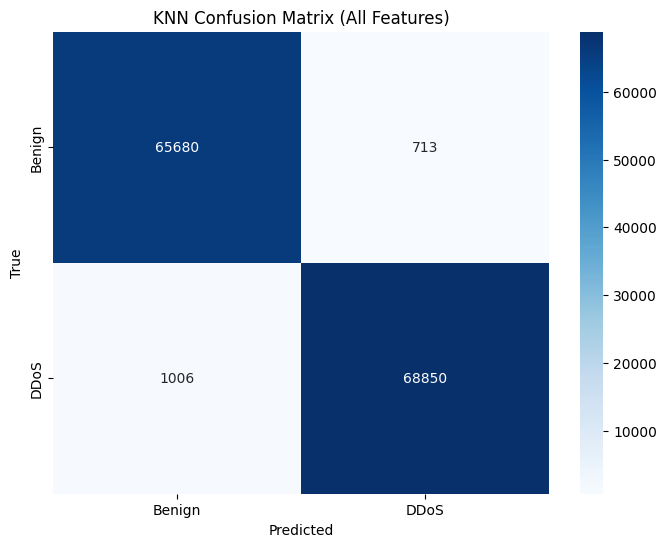

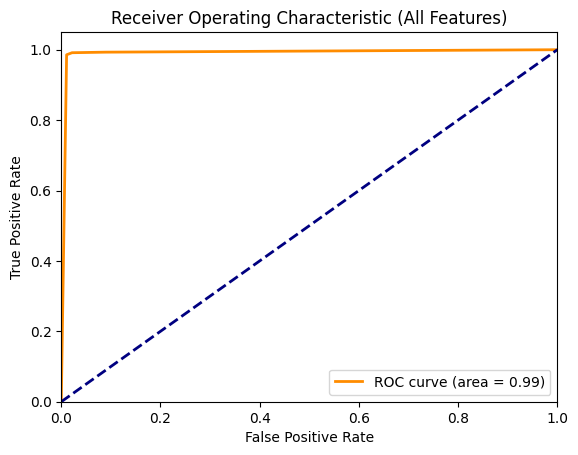

Evaluate Logistic Regression Model on All Features


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Success accuracy = 48.73 %
Fail accuracy = 51.27 %
Precision: 23.745315201058332
Recall: 48.729164984697135
F1-score: 31.930946702351903
Training time: 0:00:01.632564
AUC: 50.0


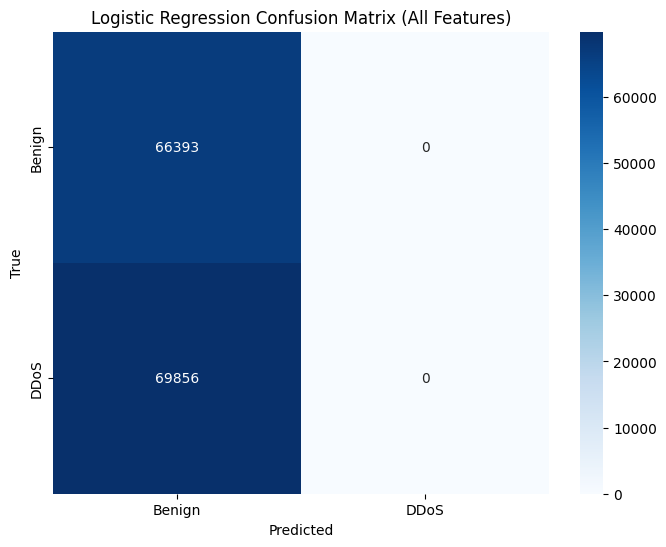

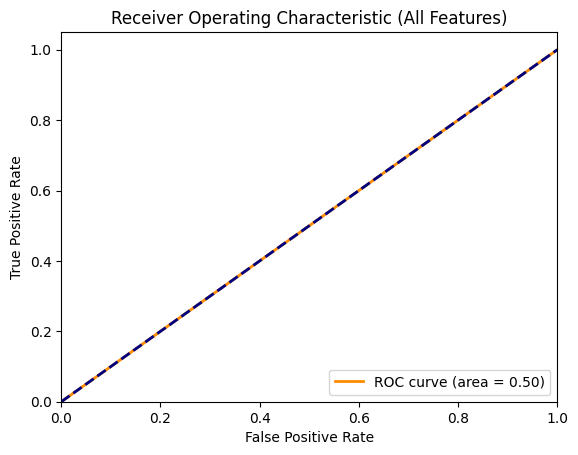

Evaluate Neural Network Model on All Features
Success accuracy = 51.27 %
Fail accuracy = 48.73 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 26.28698523166406
Recall: 51.270835015302865
F1-score: 34.754862335498856
Training time: 0:00:08.942456
AUC: 50.0


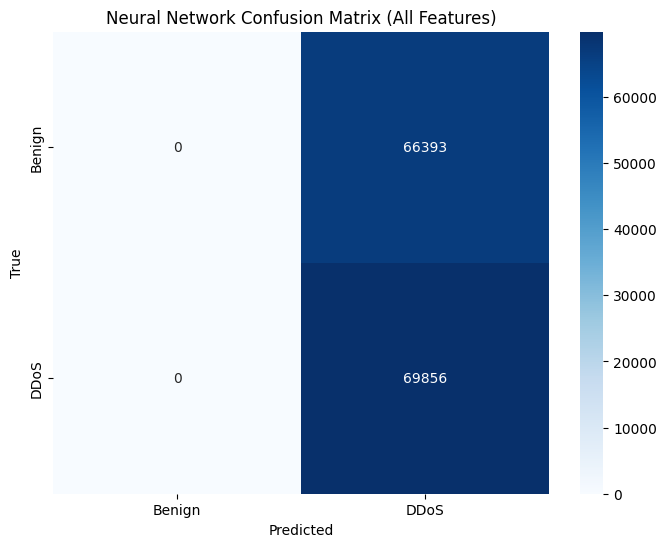

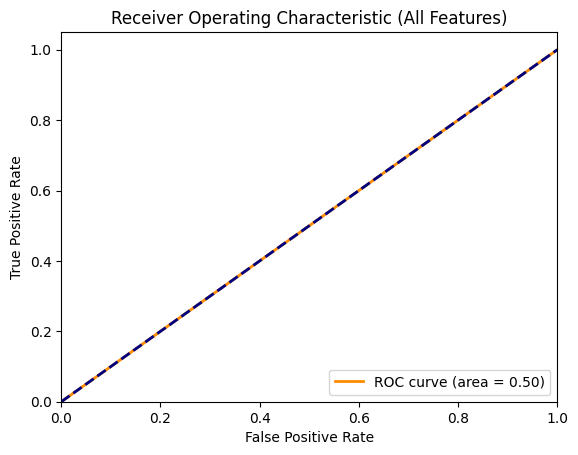

Evaluate SVM Model on All Features


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 50.91 %
Fail accuracy = 49.09 %
Precision: 26.197179479685108
Recall: 50.91266724893394
F1-score: 34.59398088038956
Training time: 0:19:24.213173
AUC: 39.68392375788503


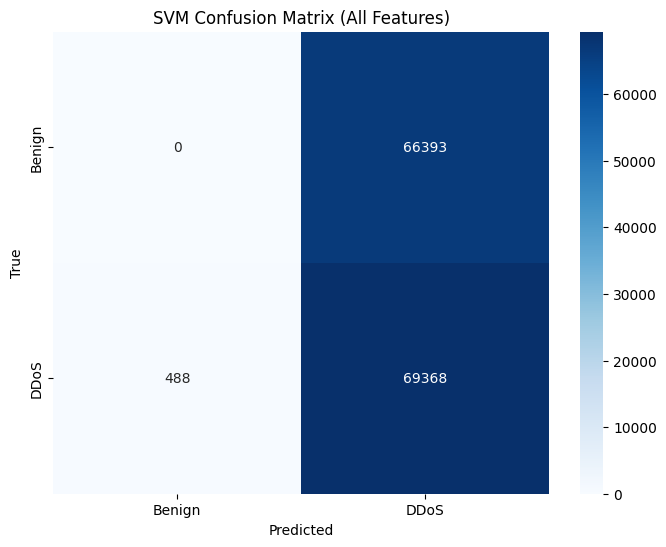

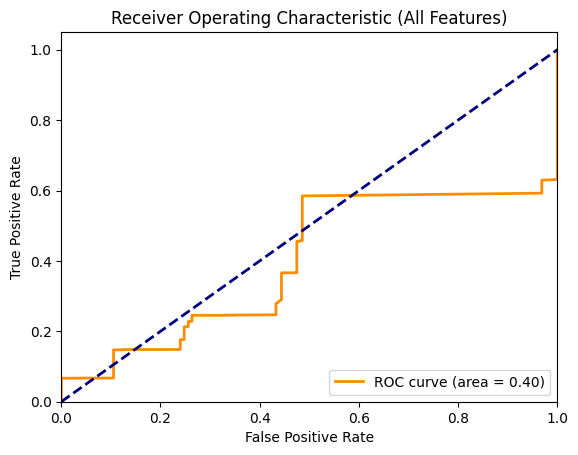

Evaluate GaussianNB Model on All Features
Success accuracy = 51.65 %
Fail accuracy = 48.35 %
Precision: 75.73139110216634
Recall: 51.653223142922144
F1-score: 38.10389213169852
Training time: 0:00:00.633162
AUC: 40.28477866268264


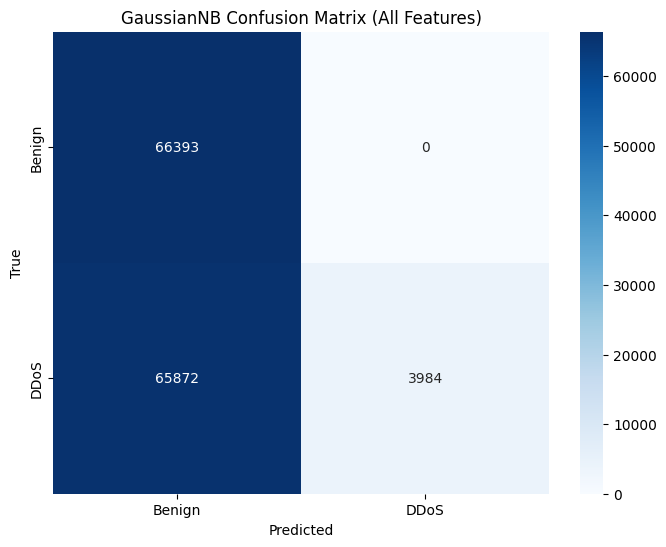

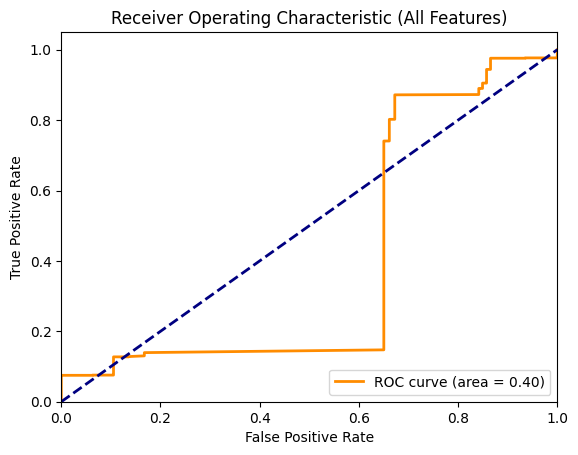

                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         98.738339       1.261661  98.739379  98.738339   
1  Logistic Regression         48.729165      51.270835  23.745315  48.729165   
2       Neural Network         51.270835      48.729165  26.286985  51.270835   
3                  SVM         50.912667      49.087333  26.197179  50.912667   
4           GaussianNB         51.653223      48.346777  75.731391  51.653223   

    F1 Score  Training Time       AUC  
0  98.738403     746.226072  0.990752  
1  31.930947       1.632564  0.500000  
2  34.754862       8.942456  0.500000  
3  34.593981    1164.213173  0.396839  
4  38.103892       0.633162  0.402848  


In [14]:
results_4_features = train_and_evaluate(df_4_features, "4 Features")
results_10_features = train_and_evaluate(df_10_features, "10 Features")
results_15_features = train_and_evaluate(df_15_features, "15 Features")
results_all_features = train_and_evaluate(df_all_features, "All Features")

In [15]:
# Combine results
all_results = {
    "4 Features": results_4_features,
    "10 Features": results_10_features,
    "15 Features": results_15_features,
    "All Features": results_all_features
}

for feature_set_name, results_df in all_results.items():
    print(f"\nResults for {feature_set_name}:")
    print(results_df)


Results for 4 Features:
                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         83.746670      16.253330  84.110549  83.746670   
1  Logistic Regression         50.371012      49.628988  61.672792  50.371012   
2       Neural Network         87.588166      12.411834  89.744704  87.588166   
3                  SVM         54.720402      45.279598  75.944996  54.720402   
4           GaussianNB         57.698772      42.301228  76.816412  57.698772   

    F1 Score  Training Time       AUC  
0  83.675206     180.526697  0.876206  
1  36.917326       3.945967  0.786880  
2  87.374608       9.676981  0.874990  
3  42.009965     696.576334  0.535404  
4  47.655747       0.172676  0.867371  

Results for 10 Features:
                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         96.160706       3.839294  96.424424  96.160706   
1  Logistic Regression         64.076801      35.923199  68.

### CHOOSE KNN MODEL WITH 15 features

In [16]:
def train_and_evaluate_for_KNN_15features(df, feature_set_name):
    X = df.drop('label', axis=1).values.astype(float)
    y = df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    print(f"The train dataset size for {feature_set_name} = ", X_train.shape)
    print(f"The test dataset size for {feature_set_name} = ", X_test.shape)

    models = {
        'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    }

    results = []

    for model_name, model in models.items():
        print(f"Evaluate {model_name} Model on {feature_set_name}")
        start_time = datetime.now()
        try:
            model.fit(X_train, y_train)
        except Exception as e:
            print(f"Error while fitting {model_name}: {e}")
            continue
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
        end_time = datetime.now()
        acc, fail, precision, recall, f1, training_time = evaluate_model(y_test, y_pred, start_time, end_time)

        # Calculate ROC and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print(f"AUC:", roc_auc*100)

        results.append({
            'Model': model_name,
            'Success Accuracy': acc * 100,
            'Fail Accuracy': fail * 100,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1 Score': f1 * 100,
            'Training Time': training_time.total_seconds(),
            'AUC': roc_auc
        })
        plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], f'{model_name} Confusion Matrix ({feature_set_name})')
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic ({feature_set_name})')
        plt.legend(loc='lower right')
        plt.show()

    results_df = pd.DataFrame(results)
    print(results_df)
    return results_df

The train dataset size for 15 Features =  (408744, 15)
The test dataset size for 15 Features =  (136249, 15)
Evaluate KNN Model on 15 Features
Success accuracy = 99.39 %
Fail accuracy = 0.61 %
Precision: 99.39329563769671
Recall: 99.38568356465002
F1-score: 99.38575620851236
Training time: 0:00:59.580663
AUC: 99.66569411099536


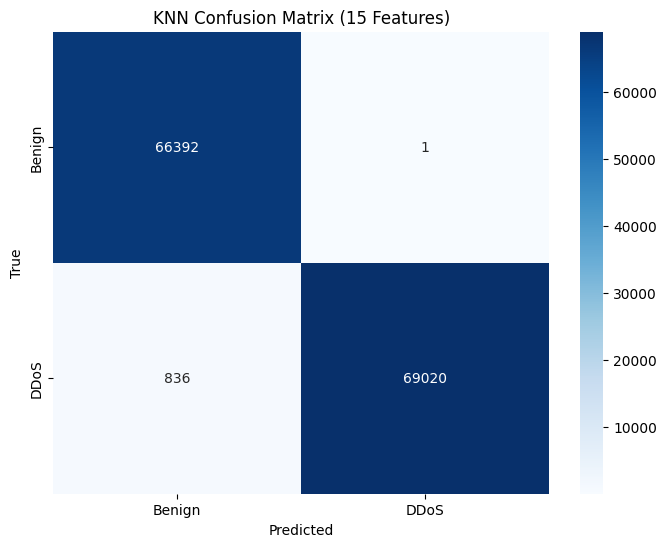

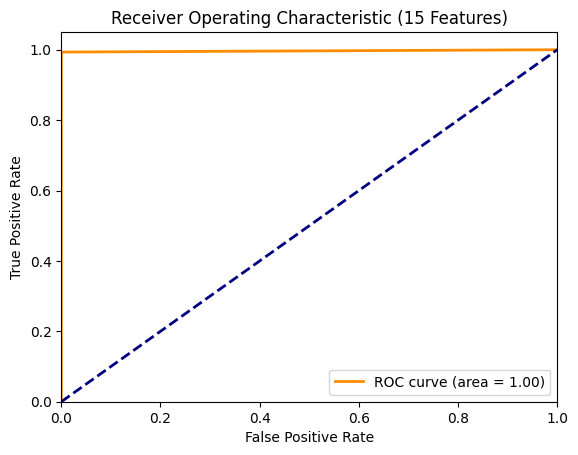

  Model  Success Accuracy  Fail Accuracy  Precision     Recall   F1 Score  \
0   KNN         99.385684       0.614316  99.393296  99.385684  99.385756   

   Training Time       AUC  
0      59.580663  0.996657  


In [17]:
results_15_features_final = train_and_evaluate_for_KNN_15features(df_15_features, "15 Features")